# Multivariate Linear Regression

In this notebook we will explore the <span style="color:red"> multivariate</span> linear regression ,where multiple variables are used to predict a outcome variable. We will work with the advertising dataset 
[link of the course](https://openclassrooms.com/en/courses/5873596-design-effective-statistical-models-to-understand-your-data/6229526-build-and-interpret-a-multivariate-linear-regression-model)


In [1]:
import pandas as pd
df=pd.read_csv("data/advertising.csv")
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


Then let's simplify the way we do the model with formula methode of the statsmodels python library

In [3]:
import statsmodels.formula.api as smf
model=smf.ols(formula="Sales ~ TV + Radio + Newspaper",data=df)
results=model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sun, 21 Jun 2020   Prob (F-statistic):           1.58e-96
Time:                        18:18:25   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The formula <span style="color:blue"> Sales ~ TV + Radio + Newspaper </span> define a linear regression model with TV,radio ,newspaper and Sales as target

* the coef of Newspaper is negative: that's mean more we spent on newspaper ads less is the Sales .This realy make no sense 

But the p value of Newspaper is well above the 0.05 so we cannot reject the null hypothesis which is the spending on Newspaper add have no effect on the amount of sales. So we cannot trust on the coefficient of the newspaper
 
* We have two new metrics to assess the quality of the model:

    * Adj. R-squared: a version of R-squared that takes the complexity of the model into account.

    * The F-statistic that tells you if your model is any better than a nothing model.

* And three new metrics for model comparison:

    * The log-likelihood: a measure of the probability of each sample given the model.

    * AIC and its cousin BIC based on the number of samples and the log-likelihood.!
    
<img src="linear.PNG" >

In [10]:
results.pvalues["Newspaper"]

0.8599150500805863

The p value of Newspaper is well above 0.05 .So we cant reject the null hypothesis .The newspaper coefficient is not reliable

Let's remove it to the model 

In [11]:
model=smf.ols(formula="Sales ~ TV + Radio",data=df)
results2=model.fit()
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Thu, 11 Jun 2020   Prob (F-statistic):           4.83e-98
Time:                        18:40:48   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9211      0.294      9.919      0.000       2.340       3.502
TV             0.0458      0.001     32.909      0.000       0.043       0.048
Radio          0.1880      0.008     23.382      0.000       0.172       0.204
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                         425.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
print("M1 R squared : {} \t M2 R squared : {} ".format(results.rsquared,results2.rsquared))

M1 R squared : 0.8972106381789522 	 M2 R squared : 0.8971942610828957 


We have the same R-squared in the 2 model so we can conclude that the Newspaper only have not effect on the sales


# Interaction terms
lets interact TV and Newspaper as we know the variation of spending tv add impact the Sales

In [20]:
model3=smf.ols(formula="Sales ~ Radio + TV*Newspaper",data=df)
results3=model3.fit()
results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     456.2
Date:                Thu, 11 Jun 2020   Prob (F-statistic):           9.06e-98
Time:                        19:00:04   Log-Likelihood:                -379.90
No. Observations:                 200   AIC:                             769.8
Df Residuals:                     195   BIC:                             786.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        3.8731      0.401      9.655      0.000       3.082       4.664
Radio            0.1901      0.008     22.692      0.000       0.174       0.207
TV               0.0393      0.002     17.312      0.000       0.035       0.044
Newspaper       -0.0320      0.010     -3.074      0.002      -0.053      -0.011
TV:Newspaper     0.0002   5.68e-05      3.554      0.000    8.98e-05       0.000
==============================================================================
Omnibus:                       78.746   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              306.193
Skew:                          -1.542   Prob(JB):                     3.24e-67
Kurtosis:                       8.218   Cond. No.                     2.32e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.32e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [21]:
results3.pvalues["Newspaper"]

0.00241337933145965

The p value of Newspaper is now lower than 0.05 then the coeffience is reliabe

Also the coeffiecient of TV and Newspaper are roughly compensates

# all models

In [37]:
formula={
    "Sales ~ TV + Radio + Newspaper",
    "Sales ~ Radio + TV*Newspaper",
    "Sales ~ TV + Radio*Newspaper",
    "Sales ~ TV*Radio"
}
for string in formula:
    results=smf.ols(formula=string,data=df).fit()
    print("\n \n ---{}".format(string))
    print("R squared : {} \t Adj R-squared {}  ".format(results.rsquared,results.rsquared_adj) )
    print("F statistic : {} \t f-proba {}  ".format(results.fvalue,results.f_pvalue) )


 
 ---Sales ~ TV + Radio*Newspaper
R squared : 0.8974526054609885 	 Adj R-squared 0.8953490691627524  
F statistic : 426.639942564112 	 f-proba 3.251642147152643e-95  

 
 ---Sales ~ TV + Radio + Newspaper
R squared : 0.8972106381789522 	 Adj R-squared 0.8956373316204668  
F statistic : 570.2707036590944 	 f-proba 1.575227256092416e-96  

 
 ---Sales ~ TV*Radio
R squared : 0.9677905498482523 	 Adj R-squared 0.9672975480602154  
F statistic : 1963.056875922952 	 f-proba 6.68424651686086e-146  

 
 ---Sales ~ Radio + TV*Newspaper
R squared : 0.9034636281763918 	 Adj R-squared 0.9014833949082153  
F statistic : 456.241010943277 	 f-proba 9.061238913394887e-98  


The best model is the thirdth model its R squared is 0.97 and its f static is higher than all the other

# QQ plot
It tells us if a residual of model are normaly distributed ,which is a necessary outcome for a good model

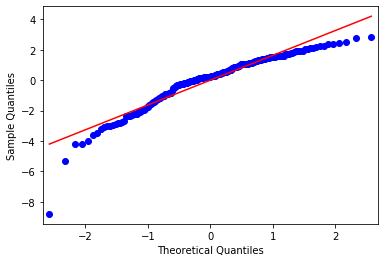

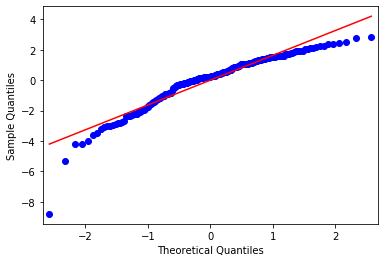

In [44]:
import statsmodels.api as sm
results3=smf.ols(formula="Sales ~ Radio*TV ",data=df).fit()
sm.qqplot(results2.resid,line="r")

We see that the point of the quantiles plot are not well aligned with the straight plot line .That's indicated their is still some information in the dataset that could be exploided in order to get a more efficient model